In [3]:
import os
import matplotlib.pyplot as plt 
import numpy as np
import pickle
import argparse
import sys
import time
import fnmatch
import scipy 
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

2023-07-20 11:44:19.275550: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
#################################################################
# Default plotting parameters
FONTSIZE = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = FONTSIZE

#################################################################

In [5]:
def read_all_rotations(dirname, filebase):
    '''Read results from dirname from files matching filebase'''

    # The set of files in the directory
    files = fnmatch.filter(os.listdir(dirname), filebase)
    test_predictions = []
    train, testing, validation = [], [], []
    train_accuracy, test_accuracy, val_accuracy = [], [], []
    # Loop over matching files
    for f in sorted(files):
        print(f)
        fp = open("%s/%s"%(dirname,f), "rb")
        r = pickle.load(fp)
        fp.close()
        train_accuracy.append(r['history']['sparse_categorical_accuracy'])
        val_accuracy.append(r['history']['val_sparse_categorical_accuracy'])
        test_accuracy.append(r['predict_testing_eval'][1])
        
        # test_predictions.append(r['predict_testing'])

        # results.append(r)
    return train_accuracy, test_accuracy, val_accuracy

In [6]:
# /home/vishnupk/geocarb/methane_hotspot_detection/results/image__Cfilters_32_64_128_256_512_1024_Pool_same_Pad_100_5_hidden__LR_0.001000_ntrain_03_rot_00_results.pkl
fp = open("/home/vishnupk/geocarb/methane_hotspot_detection/results/image__Cfilters_32_64_128_256_512_1024_Pool_same_Pad_100_5_hidden__LR_0.001000_ntrain_03_rot_00_results.pkl", "rb")
r = pickle.load(fp)

In [14]:
r['history']['loss']
r['history']['val_loss']
r['predict_training_eval'][1]

0.8953857421875

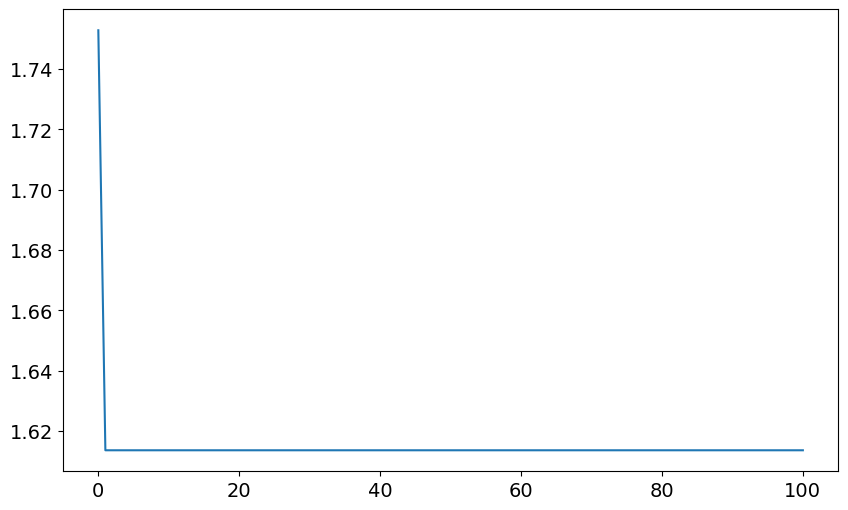

In [15]:
plt.plot(r['history']['loss'])

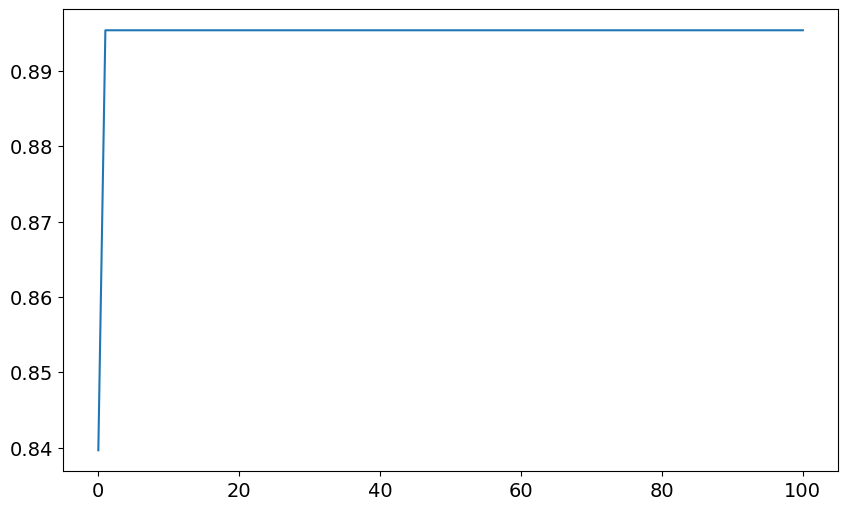

In [16]:
plt.plot(r['history']['accuracy'])

In [23]:
r['predict_validation'][1].shape

(256, 256, 1)

<AxesSubplot: >

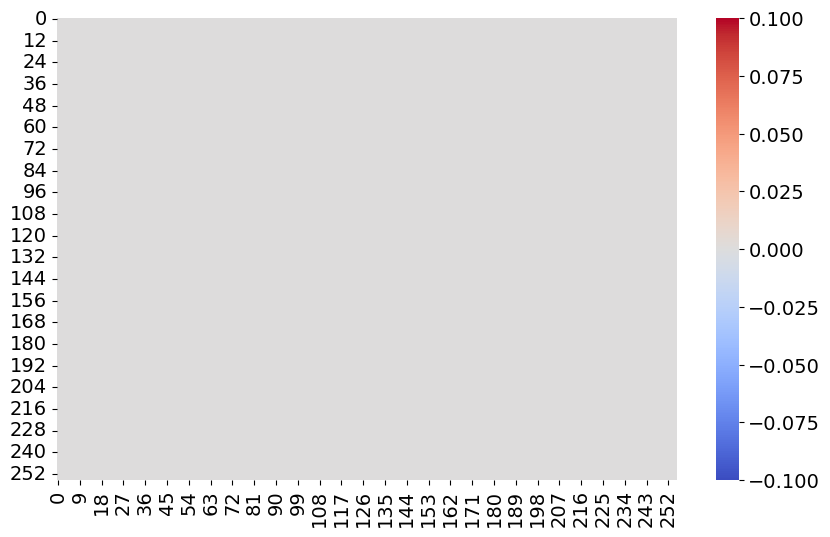

In [30]:
a = np.squeeze(r['predict_validation'][0])

sns.heatmap(a, cmap="coolwarm")

ValueError: x and y can be no greater than 2D, but have shapes (256,) and (256, 256, 1)

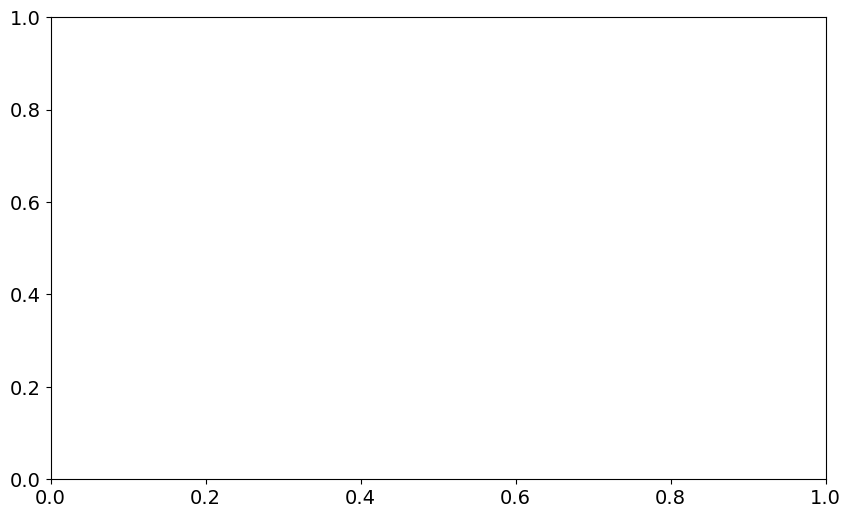

In [27]:
plt.plot(r['predict_validation'][0], 'o')
plt.show()

In [ ]:
import tensorflow as tf
train_dataset = tf.data.Dataset.load("train_dataset = tf.data.Dataset.load('/ourdisk/hpc/geocarb/vishnupk/datasets/methane/12/train.tfrecords")


In [2]:

def create_parser():
    # Parse the command-line arguments
    parser = argparse.ArgumentParser(description='Plotter Function', fromfile_prefix_chars='@')
    
    # Path instructions handler 
    parser.add_argument('--path', type = str, default = '/home/cs504305/deep_learning_practice/homework/hw6/results',help = 'Provide path to the result file')
    parser.add_argument('--base', type = str, default = 'image*rot*_results.pkl', help= 'Provide Filename structure for results, may use * for wildcard')
    parser.add_argument('--unet_path', type = str, default = '/home/cs504305/deep_learning_practice/homework/hw7/results/Unet/run9/', help= 'Provide path to UNET Network')
    parser.add_argument('--auto_path', type = str, default = '/home/cs504305/deep_learning_practice/homework/hw7/results/auto/run9/', help= 'Provide path to AUTOENCODER Network')
    parser.add_argument('--ds_path', type = str, default = '/home/cs504305/deep_learning_practice/homework/hw7/results/ds/run9/', help= 'Provide path to Testing Dataset')
    parser.add_argument('--ds_base', type = str, default = '*_test.pkl', help= 'Provide base to Testing Dataset')
    # Print Figures
    parser.add_argument('--plot', action='store_true', help='Plot results')

    # 
    return parser
    
def plot_hist(
    data1 = None, 
    data2 = None, 
    title = "Hello"
):
    if data2 is not None:
        x = np.array([data1,data2])
        x = x.T
    else:
        x = data1
        
    colors = ['red', 'blue']
    plt.hist(x, 7, density=False, histtype='step', color=colors, label = ("shallow", "deep"), fill = True, stacked = False, alpha = 0.5)
    plt.title("Accuracy between Shallow and Deep Networks")
    plt.legend()
    # plt.set_title('stacked bar')
    plt.savefig("plots/Fig3_%s.png"%title)
    plt.clf()
    print('Figure Saved: %s'%title)
    return 0

def prepare_result(results):
    
    '''
    
    This Function takes the result file as an input and prepares the data for plotting
    
    '''
    
    # Create data for plotting 
    
    train_accuracy = []
    val_accuracy = []
    test_accuracy = []
    
    train_accuracy.append(results['history']['sparse_categorical_accuracy'])
    val_accuracy.append(results['history']['val_sparse_categorical_accuracy'])
    test_accuracy.append(results['predict_testing_eval'][1])

    return train_accuracy, val_accuracy, test_accuracy

def plot_results_new(data1, label1 = 'Hello' , data2 = None, label2 = None , data3 = None, label3 = None, data4 = None, label4 = None, graph_params = None):
    
    '''
    We are taking the data as a set of all the results for each model including all rotations and plotting them
    
    ''' 
    
    for data in data1:
        print(data)
        plt.plot(range(0,len(data)), data, label = label1 +'_Rot_' +str(data1.index(data)), alpha = 0.1 + 0.2*data1.index(data), color = 'red')
    if data2 is not None:
        for data in data2:
            plt.plot(range(0,len(data)), data, label = label2 +'_Rot_' +str(data2.index(data)), alpha = 0.1 + 0.2*data2.index(data), color = 'blue')
    if data3 is not None:
        for data in data3:
            plt.plot(range(0,len(data)), data, label = label3 +'_Rot_' +str(data3.index(data)), alpha = 0.1 + 0.2*data3.index(data), color = 'green')
    if data4 is not None:
        for data in data4:
            plt.plot(range(0,len(data)), data, label = label4 +'_Rot_' +str(data4.index(data)), alpha = 0.1 + 0.2*data4.index(data), color = 'yellow')
    
    plt.legend()
    if graph_params is not None:
        plt.title(graph_params['title'])
        plt.xlabel(graph_params['xlabel'])
        plt.ylabel(graph_params['ylabel'])

    plt.savefig("plots/Fig1_%s.png"%graph_params['title'])
    print('Figure Saved: %s'%graph_params['title'])
    plt.clf()
    
    return 0

def plot_scatter(data1, data2, graph_params):
    
    # Plot the scatter plot of the data
    plt.scatter(data1, data2, c=['red', 'blue', 'green', 'yellow', 'orange'], alpha = 0.5, s = [100, 100, 100, 100, 100])
    
    for i in range(len(data1)):
        plt.text(data1[i], data2[i], str(i), fontsize=12)  
    
    if graph_params is not None:
        plt.title(graph_params['title'])
        plt.xlabel(graph_params['xlabel'])
        plt.ylabel(graph_params['ylabel'])

    plt.savefig("plots/Fig3_%s.png"%graph_params['title'])
    print('Figure Saved: %s'%graph_params['title'])
    plt.clf()
    
    return 0

def create_confusion_matrix(dirname, filebase, test_path, test_base):
    
    # The set of files in the directory
    files = fnmatch.filter(os.listdir(dirname), filebase)
    files.sort()
    test_predictions = []
    train, testing, validation = [], [], []
    # Loop over matching files
    for f in files:
        print(f)
        fp = open("%s/%s"%(dirname,f), "rb")
        r = pickle.load(fp)
        fp.close()
        arr = np.array(r['predict_testing'])
        print(arr.shape)
        test_predictions.append(arr)
        
        # print(len(r['predict_testing']))

    # print(test_predictions[0][0])
    
    files = fnmatch.filter(os.listdir(test_path), test_base)
    files.sort()
    true_labels = []
    
    for f in files:
        print(f)
        fp = open("%s/%s"%(test_path,f), "rb")
        r = pickle.load(fp)
        fp.close()
        true_labels.append(r)
        # print(len(r['test_labels']))
    
    return 0

def get_interesting_images(preds, preds2, ds_test):
    
    image_data = list(ds_test.as_numpy_iterator())
    
    i = 3
    j = 12
    k =13

    a_plot = image_data[0][0][i][:,:,0:3]
    b_plot = image_data[0][0][j][:,:,0:3]
    c_plot = image_data[0][0][k][:,:,0:3]

    a_labels = image_data[0][1][i]
    b_labels = image_data[0][1][j]
    c_labels = image_data[0][1][k]

    a_preds = preds[i]
    b_preds = preds[j]
    c_preds = preds[k]

    a_preds2 = preds2[i]
    b_preds2 = preds2[j]
    c_preds2 = preds2[k]

    fig, (ax1, ax2, ax3) = plt.subplots(3, 3)
    fig.suptitle('AUTO Predictions')
    ax1[0].imshow(a_plot)
    ax1[1].imshow(a_labels, cmap = cmap)
    ax1[2].imshow(a_preds, cmap= cmap)

    ax2[0].imshow(b_plot)
    ax2[1].imshow(b_labels, cmap = cmap)
    ax2[2].imshow(b_preds, cmap= cmap)

    ax3[0].imshow(c_plot)
    ax3[1].imshow(c_labels, cmap = cmap)
    ax3[2].imshow(c_preds, cmap= cmap)

    plt.savefig("AUTO_FIG_{}".format(i))
    plt.clf()

    fig, (ax1, ax2, ax3) = plt.subplots(3, 3)
    fig.suptitle('UNET Predictions')
    ax1[0].imshow(a_plot)
    ax1[1].imshow(a_labels, cmap = cmap)
    ax1[2].imshow(a_preds2, cmap= cmap)

    ax2[0].imshow(b_plot)
    ax2[1].imshow(b_labels, cmap = cmap)
    ax2[2].imshow(b_preds2, cmap= cmap)

    ax3[0].imshow(c_plot)
    ax3[1].imshow(c_labels, cmap = cmap)
    ax3[2].imshow(c_preds2, cmap= cmap)

    plt.savefig("UNET_FIG_{}".format(i))
    
    
    return 0

def build_confusion_matrix():
    
    # files in the directory for the results of the models 
    for i in range(5):
        # LOAD THE MODEL
        #model = load_model('models/autoencoder/image_Csize_2_2_2_2_2_Cfilters_30_60_90_120_Pool_3_3_3_3_Pad_same_hidden_100_5_LR_0.001000_ntrain_03_rot_00_model', compile=False)
        
        # LOAD THE DATA
        ds_test = pd.read_pickle('results/ds_test/{}_ds_test.pkl'.format(i))
        print(ds_test.shape)
        #result = model.predict(ds_test)
        #print(result)
        # LOAD MODELS 
        model = load_model('/content/drive/MyDrive/PhD/AML/HW7/Code/results/autoencoder/image_Csize_2_2_2_2_2_Cfilters_30_60_90_120_Pool_3_3_3_3_Pad_same_hidden_100_5_LR_0.001000_ntrain_03_rot_04_model')
        model2 = load_model('/content/drive/MyDrive/PhD/AML/HW7/Code/results/unet/image_Csize_2_2_2_2_2_Cfilters_30_60_90_120_Pool_3_3_3_3_Pad_same_hidden_100_5_LR_0.001000_ntrain_03_rot_04_model')
        
        # MAKE PREDICTIONS 
        predictions = model.predict(ds_test)
        predictions2 = model2.predict(ds_test)

        # CONVERT TO LABELS
        preds = np.argmax(predictions, axis = 3)
        preds2 = np.argmax(predictions2, axis = 3)

        # GET OUTPUTS 
        y = np.concatenate([y for x, y in ds_test], axis=0)

        y= np.reshape(y, (250*256*256))
        preds = np.reshape(preds,(250*256*256))
        preds2 = np.reshape(preds2,(250*256*256))

        #CREATE CONFUSUION MATRIX
        conf1 = tf.math.confusion_matrix(
            y,
            preds,
            num_classes=None,
            weights=None,
            dtype=tf.dtypes.int32,
            name=None
        )

        conf2 = tf.math.confusion_matrix(
            y,
            preds2,
            num_classes=None,
            weights=None,
            dtype=tf.dtypes.int32,
            name=None
        )

        plt.figure(figsize = (10,7))
        plt.title('AUTO: Confusion Matrix heatmap for Fold 9')
        sns.heatmap(conf/np.sum(conf), annot=True, fmt='.2%', cmap='Blues')
        plt.xlabel('True Labels')
        plt.ylabel('Predicted Labels')
        plt.savefig('heatmap1.png')
        #plt.savefig('heatmap.pdf')
        
        plt.figure(figsize = (10,7))
        plt.title('UNET: Confusion Matrix heatmap for Fold 9')
        sns.heatmap(conf2/np.sum(conf2), annot=True, fmt='.2%', cmap='Blues')
        plt.xlabel('True Labels')
        plt.ylabel('Predicted Labels')
        plt.savefig('heatmap2.png')
        #plt.savefig('heatmap.pdf')

    
    return preds, preds2

if __name__ == "__main__":
    
    # Hide GPU from visible devices if you want to use CPU
    # os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
    
    parser = create_parser()
    args = parser.parse_args()

    '''
    Handle the arguments to provide inputs to the function to build figures for HW 7
    
    1. We have path variables to provide the path to the results files
    2. We have unet_path and auto_path to provide the path to the deep learning results files
    3. We need to get the results and plot them for the following:
        1. Model plots for each model
        2. Validation Accuracy vs Training Epochs
        3-7. Confusion Matrix for each model
        8. Scatter plot of the test accuracy results
        9. Show interesting images for both models
    ''' 
    
  
    # Get the results for the all models
    auto_train_accuracy, auto_test_accuracy, auto_val_accuracy = read_all_rotations(args.auto_path, args.base)
    unet_train_accuracy, unet_test_accuracy, unet_val_accuracy = read_all_rotations(args.unet_path, args.base)
    

    # unet = read_all_rotations(args.unet_path, args.base)
    
    # print(auto[0]['history'].keys())
    # Make the results in plottable format
    
    # auto_train_accuracy, auto_val_accuracy, auto_test_accuracy = prepare_result(auto)
    # unet_train_accuracy, unet_val_accuracy, unet_test_accuracy = prepare_result(unet)
    

    '''
  Plot Figures 1 2 3 
  
  We are plotting a total of 3 figures here 
  
    1. Training set accuracy as a function of epoch for each rotation.
    2. Validation set accuracy as a function of epoch for each rotation.
    3. Scatter plot of the test set accuracy for each rotation.
  
  We had to make multiple iterations of plot_results because we have some amount of manual inputs going into the function here. 
  Figures and Plots need to be personalized for this task
    '''
    if args.plot:
    
        # # Plot Figure 1
        # graph_params = {'title': 'Training Set Accuracy', 'xlabel': 'Epochs', 'ylabel': 'Accuracy'}
        # plot_results_new(gru_train_accuracy, 'GRU', mha_train_accuracy, 'MHA',  graph_params = graph_params)
        
        
        # Plot Figure 2 - Validation Set Accuracy
        graph_params = {'title': 'Validation Set Accuracy', 'xlabel': 'Training Epochs', 'ylabel': 'Accuracy'}
        plot_results_new(auto_val_accuracy, 'Auto', unet_val_accuracy, 'UNET',  graph_params = graph_params)
        
        # Figure 3-7 Confusion Matrix
        preds , preds2 = build_confusion_matrix()
        
        #Figure 8 - Scatter Plot of Test Accuracy
        graph_params = {'title': 'Test Accuracy Scatter plot', 'xlabel': 'UNET', 'ylabel': 'AUTO'}
        plot_scatter(auto_test_accuracy, unet_test_accuracy, graph_params = graph_params)
        
        # Figure 9 - Show interesting images for both models 
        get_interesting_images(preds, preds2, ds_test):
        
        #Compute Test Accuracy(CNN) - Test Accuracy(SRNN)
        
        # graph_params = {'title': 'Test Set Accuracy for each rotation', 'xlabel': 'GRU', 'ylabel': 'MHA'}
        # plot_scatter(gru_test_accuracy, mha_test_accuracy, graph_params = graph_params)

        # graph_params = {'title': 'Number of Training Epochs', 'xlabel': 'GRU', 'ylabel': 'MHA'}
        # plot_scatter(gru_length, mha_length, graph_params = graph_params)

SyntaxError: invalid syntax (1484767688.py, line 403)